# Boukunde Energy Analysis and Recommendations

***Herman Carstens***

# Background

This document is written as an unofficial analysis of the energy use of *Boukunde* building. As an audit of this building also formed part of the first semester test for EES732 Energy Management, this document also serves as a possible solution to the problem posed, although it should be noted that the question was open-ended.

# Introduction

The *Boukunde* (Architecture) building is due for an upgrade in 2016. As a first step in the energy audit, the data from the energy meters are analysed.

There is a main meter located in the substation which supplies electricity to *Boukunde*, Communication Pathology, and *Kya Rosa*; a small building. A meter at Communication Pathology measures its individual energy use, and a sub-meter also measures *Boukunde*'s Heating, Ventilation and Air Conditioning (HVAC) energy use. By subtracting the HVAC and Communication Pathology values, the combined lighting, plug loads, and *Kya Rosa* energy use may be obtained, with *Kya Rosa* assumed to be negligible.

As will be seen below, the data is limited. However, this is not unusual. It should be noted that some data formatting was also done on the csv files themselves; some doubles were removed, for example. This was purely for convenience, but could have been implemented in `Python` quite easily.

First, some preliminary setup in Python:

In [40]:
%matplotlib inline 
#Displays graphs automatically
import pandas as pd
import numpy as np
import seaborn as sns
sns.set(style="darkgrid")
from pandas import set_option
set_option("display.max_rows",16,"display.max_columns",13)
import matplotlib.pyplot as plt         
pd.options.display.mpl_style='default'
from pylab import rcParams
rcParams['figure.figsize']=18,8 #figure sizes
from IPython.display import YouTubeVideo

## Data Analysis

Let us investigate the HVAC system first:

### HVAC

We first import the data as a `Pandas` DataFrame, and do a cursory check:

In [41]:
HVAC=pd.read_csv('HVAC - Copy.csv',sep="\;",index_col=0,
                  parse_dates=True,names=['Status','kw','kvar','kva','v1','v2','v3'])
HVAC

Status  kw  kvar  kva      v1      v2      v3
2015-04-27 01:00:00  800000  28     6   29  216.01    1.34  216.00
2015-04-27 01:30:00  800000  27     6   28  228.55  229.38  228.50
2015-04-27 02:00:00  800000  28     7   29  228.55  229.38  228.50
2015-04-27 02:30:00  800000  27     5   27  228.76  229.68  228.68
2015-04-27 03:00:00  800000  28     7   29  229.47  230.34  229.44
2015-04-27 03:30:00  800000  26     5   27  229.05  229.78  229.10
2015-04-27 04:00:00  800000  28     6   29  229.08  229.72  229.15
2015-04-27 04:30:00  800000  26     5   27  229.77  230.41  229.96
2015-04-27 05:00:00  800000  28     7   29  230.12  230.65  230.17
2015-04-27 05:30:00  800000  27     5   27  228.30  229.14  228.11
2015-04-27 06:00:00  800000  27     6   29  227.10  227.93  226.94
2015-04-27 06:30:00  800000  27     5   27  228.31  229.07  228.14
2015-04-27 07:00:00  800000  27     6   29  230.03  230.41  229.79
2015-04-27 07:30:00  800000  26     5   26  229.33  229.69  228.95
2015-04-27 08:00:00  800000  26     4   27  228.81  229.06  228.29
2015-04-27 08:30:00  800000  28     7   28  229.69  229.81  228.98
                        ... ...   ...  ...     ...     ...     ...

[2183 rows x 7 columns]

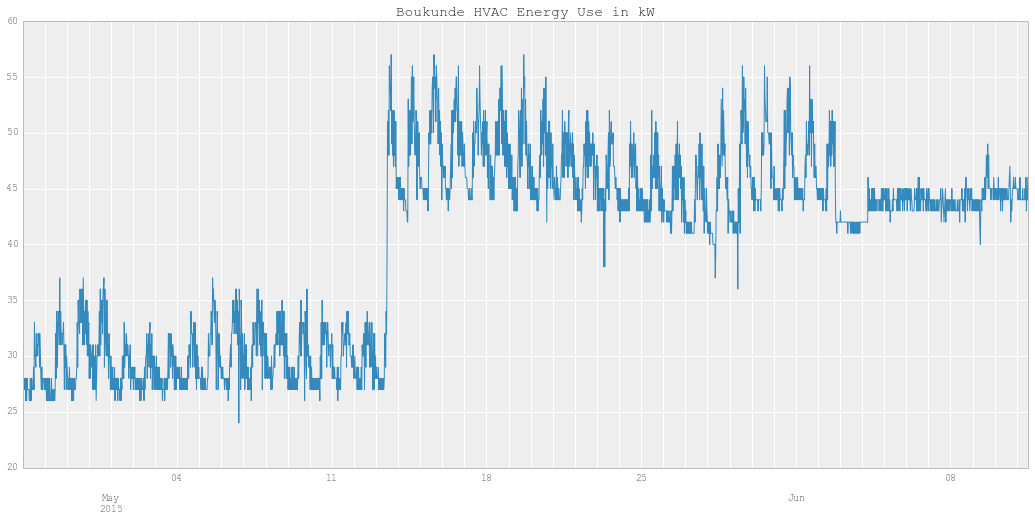

In [42]:
HVAC.kw.plot(title='Boukunde HVAC Energy Use in kW')

The first thing we notice is the step-wise nature of the graph and the integer numbers in kWh read by the meter. It seems as though the HVAC control system has pre-set values and changes motor speeds in step-wise fashion.

We also observe two changes in the HVAC data: on 13 May the set point on the HVAC system was probably changed, increasing the mean power use from about 30kW to about 47kW per half hour.
Then, on 3 June a second alteration was made, decreasing the amplitude of the daily HVAC power osscilation from 14kW to about 2kW. This coincides roughly with the commencement of exams for Semester 1, but warrants further investigation.

Let's see if the kVA and kVAr data tell us something:

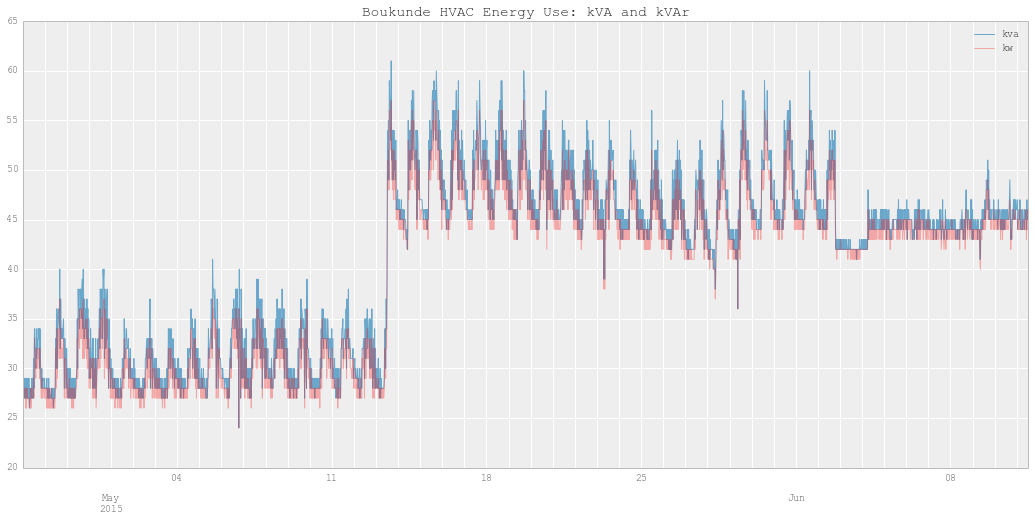

In [43]:
HVAC.kva.plot(legend=True,alpha=0.7,title='Boukunde HVAC Energy Use: kVA and kVAr') #alpha sets the transparency of the line
HVAC.kw.plot(color='r',alpha=0.3)

They seem to be close together as they should be, but we can plot the power factor, where

$PF=\frac{kW}{kVA}=cos\theta$

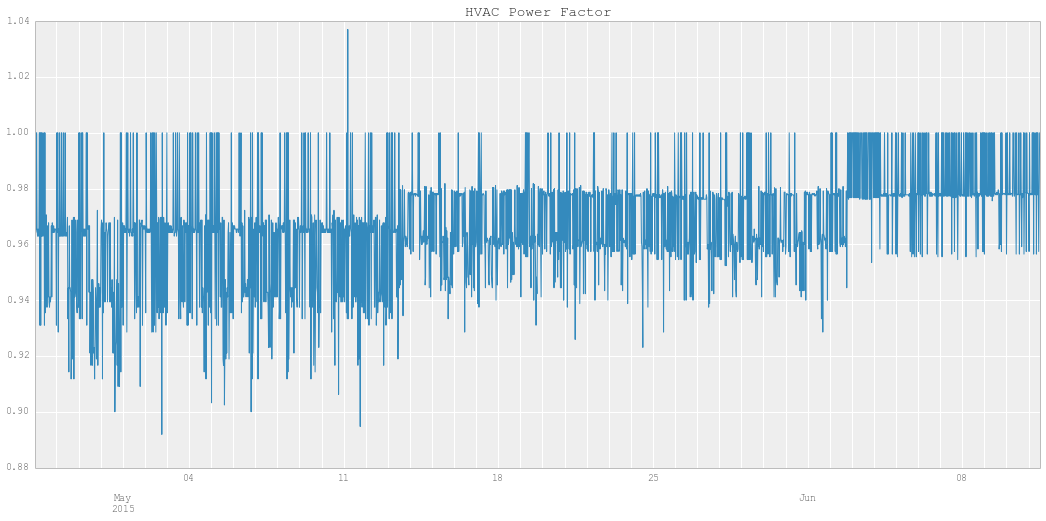

In [44]:
HVAC["PF"]=HVAC.kw/HVAC.kva
HVAC.PF.plot(title='HVAC Power Factor')

From the plot above we can see that the power factor was around 0.97, which is acceptable. After the set point change the motor loading increased, increasing the power factor as well. The change at 3 June seems to have improved the power factor even further.

We now separate the three periods identified above, and create a pivot table for each, so that instead of plotting the days sequentially, we can overlay them:

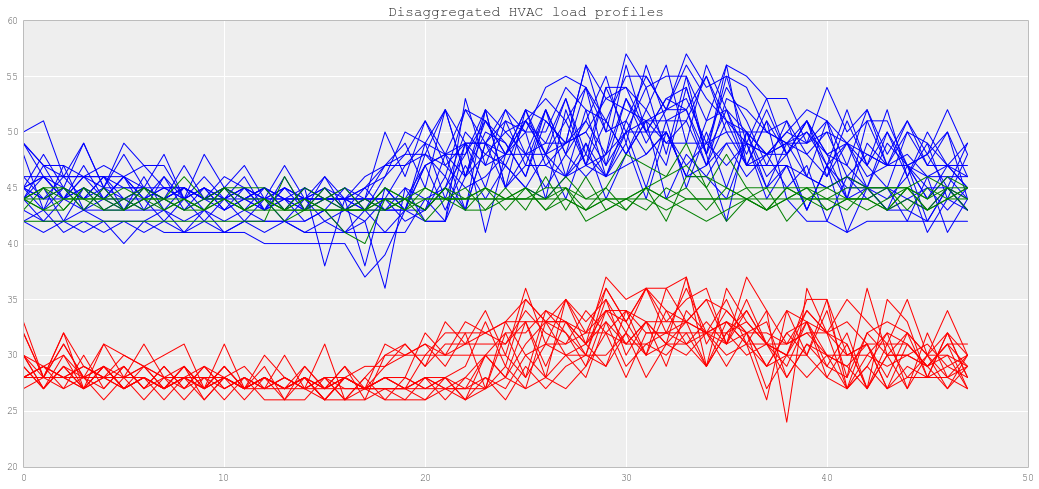

In [45]:
HVAC["Time"]=HVAC.index.time
HVAC["Date"]=HVAC.index.date

HVAC_period1=HVAC.ix[pd.datetime(2015,4,27):pd.datetime(2015,5,13)]
HVAC_period1_pivot=HVAC_period1.pivot(index="Date",columns="Time",values="kw").transpose()

HVAC_period2=HVAC.ix[pd.datetime(2015,5,14):pd.datetime(2015,6,3)]
HVAC_period2_pivot=HVAC_period2.pivot(index="Date",columns="Time",values="kw").transpose()

HVAC_period3=HVAC.ix[pd.datetime(2015,6,4):pd.datetime(2015,6,11)]
HVAC_period3_pivot=HVAC_period3.pivot(index="Date",columns="Time",values="kw").transpose()

plt.plot(HVAC_period1_pivot,'r')
plt.hold(True)
plt.title("Disaggregated HVAC load profiles")
plt.plot(HVAC_period2_pivot,'b')
plt.plot(HVAC_period3_pivot,'g')
plt.show()

These seem reasonably consistent. We could disaggregate them further by lecture days (see below), but this does not seem to be necessary since the ranges are relatively tight, indicating a small difference between different kinds of days. I don't think that the difference between the blue and green graphs is due to the exams alone; the change in variability does seem to indicate a supply-side change.

One may thus conclude that HVAC power is not strongly correlated with occupancy, but rather with static factors such as building and HVAC layout, as well as the HVAC set point.

### Lights

Now we can calculate the lighting and plug loads for *Boukunde* as:

$Lights=Main\ meter-HVAC-Communication\ Pathology$

In order to do so, we first import the Communication Pathology and Main Meter data sets, printing the first few rows to check.

In [46]:
BK_main=pd.read_csv('Main_meter - Copy.csv',sep="\;",index_col=0,
                  parse_dates=True,names=['Status','kw','kvar','kva','v1','v2','v3'])
BK_main

Status    kw  kvar   kva      v1      v2      v3
2015-04-27 00:30:00  00800000  65.8  22.0  69.8  231.75  232.24  231.55
2015-04-27 01:00:00  00800000  68.4  26.6  73.9  232.08  232.60  231.97
2015-04-27 01:30:00  00800000  64.7  21.7  68.5  231.86  232.35  231.75
2015-04-27 02:00:00  00800000  68.1  26.6  73.7  231.79  232.30  231.64
2015-04-27 02:30:00  00800000  65.1  21.6  68.9  232.26  232.71  232.14
2015-04-27 03:00:00  00800000  68.0  26.0  73.4  232.43  232.93  232.30
2015-04-27 03:30:00  00800000  64.1  21.1  67.8  232.57  233.08  232.37
2015-04-27 04:00:00  00800000  66.8  25.0  71.8  232.76  233.30  232.54
2015-04-27 04:30:00  00800000  64.6  21.7  68.5  232.34  232.87  232.28
2015-04-27 05:00:00  00800000  66.6  24.6  71.6  232.33  232.81  232.17
2015-04-27 05:30:00  00800000  64.8  21.1  68.5  231.58  232.03  231.43
2015-04-27 06:00:00  00800000  66.8  23.9  71.4  231.45  231.86  231.26
2015-04-27 06:30:00  00800000  63.6  19.7  66.9  230.43  230.97  230.29
2015-04-27 07:00:00  00800000  65.5  23.0  69.9  229.77  230.23  229.71
2015-04-27 07:30:00  00800000  61.1  18.7  64.2  229.86  230.41  229.80
2015-04-27 08:00:00  00800000  59.5  18.1  62.5  228.97  229.82  229.06
                          ...   ...   ...   ...     ...     ...     ...

[2160 rows x 7 columns]

In [47]:
Comm_Pat=pd.read_csv('Communication Pathology - Copy.csv',sep="\;",index_col=0,
                  parse_dates=True,names=['Status','kw','kvar','kva','v1','v2','v3'])
Comm_Pat

Status    kw  kvar   kva      v1      v2      v3
2015-04-27 00:30:00  800000  9.19  1.64  9.35  231.91  232.29  231.65
2015-04-27 01:00:00  800000  9.19  1.48  9.32  232.28  232.66  232.09
2015-04-27 01:30:00  800000  9.12  1.47  9.24  232.14  232.44  231.96
2015-04-27 02:00:00  800000  9.40  1.68  9.56  232.03  232.37  231.82
2015-04-27 02:30:00  800000  9.33  1.20  9.42  232.55  232.81  232.34
2015-04-27 03:00:00  800000  9.38  1.85  9.56  232.64  232.98  232.44
2015-04-27 03:30:00  800000  8.99  1.27  9.09  232.90  233.31  232.61
2015-04-27 04:00:00  800000  9.46  1.59  9.60  232.94  233.33  232.65
2015-04-27 04:30:00  800000  9.24  1.71  9.40  232.55  232.88  232.42
2015-04-27 05:00:00  800000  9.10  1.33  9.21  232.51  232.86  232.28
2015-04-27 05:30:00  800000  9.36  1.60  9.50  231.72  232.01  231.52
2015-04-27 06:00:00  800000  9.18  1.32  9.27  231.51  231.75  231.23
2015-04-27 06:30:00  800000  9.20  1.41  9.32  230.44  230.88  230.23
2015-04-27 07:00:00  800000  9.32  1.67  9.47  229.97  230.29  229.87
2015-04-27 07:30:00  800000  7.32  0.76  7.39  229.91  230.30  229.77
2015-04-27 08:00:00  800000  6.58  0.58  6.61  229.15  229.94  229.19
                        ...   ...   ...   ...     ...     ...     ...

[2184 rows x 7 columns]

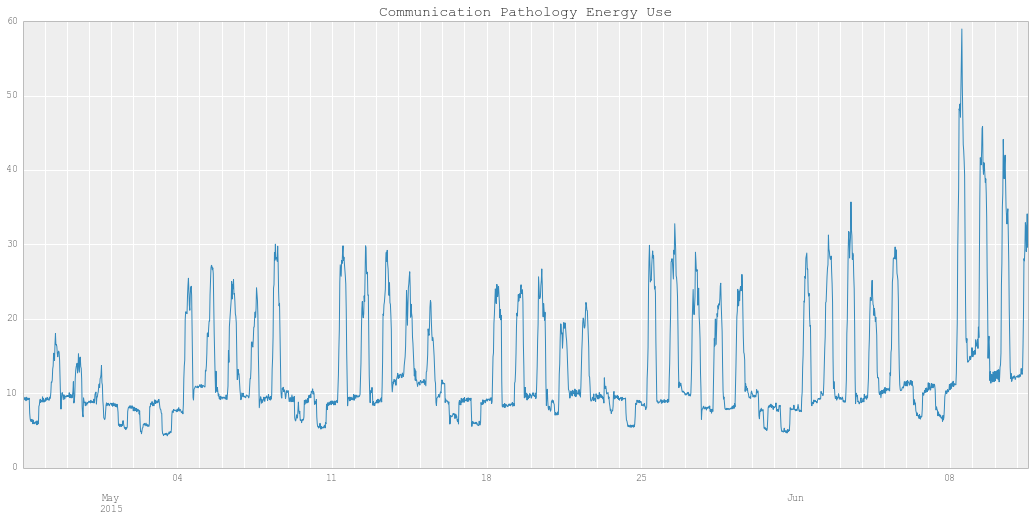

In [48]:
Comm_Pat.kw.plot(title='Communication Pathology Energy Use')

The Communication Pathology data seem to be well-behaved, with notable differences between weekdays and weekends, except for late April when the University is on recess and there are many long weekends.

We can now calculate the Boukunde light and plug load:

In [49]:
lights=pd.DataFrame(data=BK_main["kw"]-Comm_Pat["kw"]-HVAC["kw"])
lights.dropna(inplace=True) #number of rows differ between data sets
test=pd.DataFrame(data=lights.ix[pd.datetime(2015,5,4):pd.datetime(2015,5,11)])
test["Main"]=BK_main.ix[pd.datetime(2015,5,4):pd.datetime(2015,5,11)].kw
test["HVAC"]=HVAC.ix[pd.datetime(2015,5,4):pd.datetime(2015,5,11)].kw
test

kw  Main  HVAC
2015-05-04 00:00:00  45.53  81.4    28
2015-05-04 00:30:00  49.78  86.4    29
2015-05-04 01:00:00  45.36  81.1    28
2015-05-04 01:30:00  49.95  87.0    29
2015-05-04 02:00:00  47.91  83.5    28
2015-05-04 02:30:00  49.06  85.8    29
2015-05-04 03:00:00  46.48  81.3    27
2015-05-04 03:30:00  47.98  83.7    28
2015-05-04 04:00:00  46.40  80.9    27
2015-05-04 04:30:00  45.12  81.5    29
2015-05-04 05:00:00  45.61  80.1    27
2015-05-04 05:30:00  44.71  80.3    28
2015-05-04 06:00:00  45.07  79.3    27
2015-05-04 06:30:00  44.73  81.2    28
2015-05-04 07:00:00  45.34  84.3    27
2015-05-04 07:30:00  44.14  85.8    28
                       ...   ...   ...

[337 rows x 3 columns]

We'll plot only one week (the second week, which was a normal work week, whereas the week of 27 April was between two long weekends):

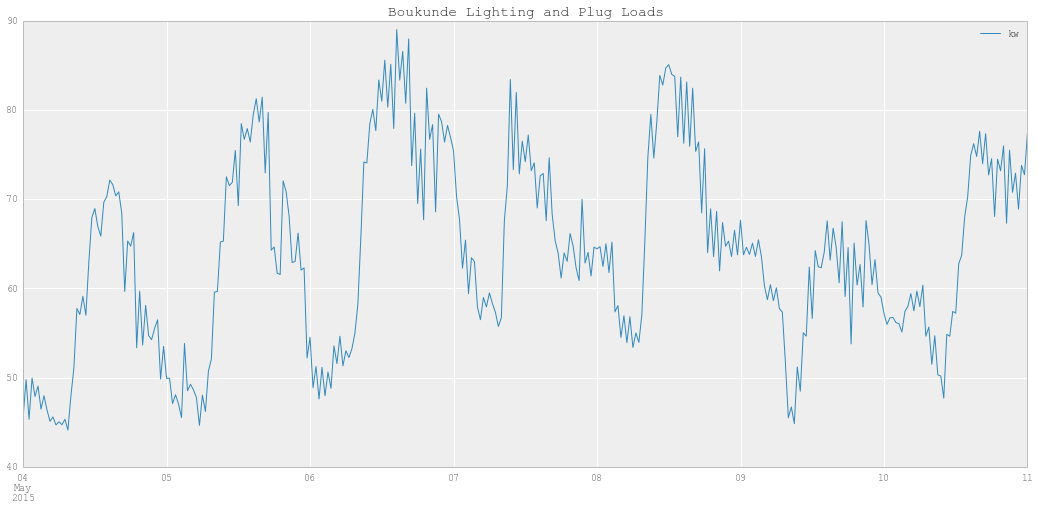

In [50]:
lights.ix[pd.datetime(2015,5,4):pd.datetime(2015,5,11)].plot(title='Boukunde Lighting and Plug Loads')

Once again, the data seem to be well behaved.

As with the HVAC system, it is useful to pivot the data so that we can overlay the days on top of each other. The pivot table is shown as an illustration below.

In [51]:
lights["Time"]=lights.index.time
lights["Date"]=lights.index.date
pivot_lights=lights.pivot(index="Date",columns="Time",values="kw")
pivot_lights

Time        00:00:00  00:30:00  01:00:00  01:30:00  02:00:00  02:30:00  \
Date                                                                     
2015-04-27       NaN       NaN     31.21     28.58     30.70     28.77   
2015-04-28     28.79     31.08     27.85     31.33     27.45     27.97   
2015-04-29     57.82     50.82     49.70     46.02     48.97     46.74   
2015-04-30     63.55     62.79     60.35     62.51     63.36     62.44   
2015-05-01     58.30     56.61     58.25     55.66     57.27     54.31   
2015-05-02     58.27     56.10     57.79     55.37     56.40     54.09   
2015-05-03     41.89     37.87     34.91     36.81     35.90     37.24   
2015-05-04     45.53     49.78     45.36     49.95     47.91     49.06   
2015-05-05     49.92     49.95     47.10     48.10     47.05     45.53   
2015-05-06     54.53     48.89     51.26     47.61     51.16     47.98   
2015-05-07     75.42     70.32     67.71     62.27     65.41     59.41   
2015-05-08     64.43     64.68     62.46     65.00     61.78     65.19   
2015-05-09     67.65     63.77     64.62     63.81     65.07     63.59   
2015-05-10     57.19     55.97     56.71     56.75     56.18     56.04   
2015-05-11     77.42     68.40     75.71     68.76     71.68     67.85   
2015-05-12     70.35     66.45     68.53     63.88     63.86     59.32   
                 ...       ...       ...       ...       ...       ...   

Time        03:00:00  03:30:00  04:00:00  04:30:00  05:00:00  05:30:00  \
Date                                                                     
2015-04-27     30.62     29.11     29.34     29.36     29.50     28.44   
2015-04-28     27.55     27.64     26.97     34.56     35.82     35.13   
2015-04-29     49.00     46.64     48.21     46.23     47.13     45.82   
2015-04-30     57.95     61.92     60.53     58.98     60.01     58.91   
2015-05-01     56.47     53.86     54.51     55.07     55.15     53.88   
2015-05-02     55.64     49.66     47.49     44.90     46.25     43.99   
2015-05-03     36.22     34.99     33.93     33.05     34.14     33.56   
2015-05-04     46.48     47.98     46.40     45.12     45.61     44.71   
2015-05-05     53.84     48.54     49.26     48.65     47.76     44.66   
2015-05-06     50.64     48.81     53.56     51.58     54.64     51.33   
2015-05-07     63.44     63.01     57.93     56.50     58.98     57.93   
2015-05-08     57.38     58.08     54.51     56.94     53.93     56.83   
2015-05-09     65.45     63.55     60.31     58.74     60.42     58.63   
2015-05-10     55.12     57.42     58.01     59.42     57.49     59.70   
2015-05-11     69.53     59.86     57.07     52.78     50.70     49.55   
2015-05-12     62.27     55.95     56.53     50.52     53.75     52.05   
                 ...       ...       ...       ...       ...       ...   

Time        06:00:00      
Date                      
2015-04-27     30.62 ...  
2015-04-28     38.32 ...  
2015-04-29     47.37 ...  
2015-04-30     59.87 ...  
2015-05-01     53.45 ...  
2015-05-02     45.87 ...  
2015-05-03     33.62 ...  
2015-05-04     45.07 ...  
2015-05-05     48.05 ...  
2015-05-06     53.03 ...  
2015-05-07     59.50 ...  
2015-05-08     53.40 ...  
2015-05-09     60.07 ...  
2015-05-10     57.97 ...  
2015-05-11     49.77 ...  
2015-05-12     54.04 ...  
                 ...      

[46 rows x 48 columns]

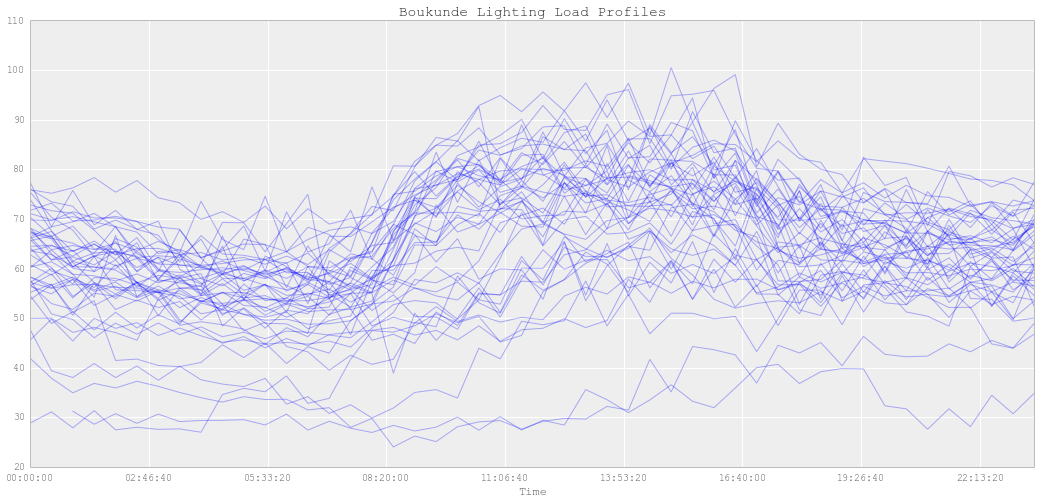

In [52]:
pivot_lights_transposed=pivot_lights.transpose()
pivot_lights_transposed.plot(color='b',legend=False,alpha=0.3,title='Boukunde Lighting Load Profiles')

From the graph above there does seem to be two sets of data: one narrowly grouped, and one more widely dispersed with no midday peak. My hunch is that the energy use can be disaggregated according to lecture days and non-lecture days. Let's see if this is true:

#### Lecture days

I would like to identify all the lecture and exam days in a year, and treat these differently to weekends, public holidays, and recess. In order to do so, we create a custom calendar date range. `Pandas`' `CustomBusinessDay` function generates the business days for the year, and allows us to add the other holidays.

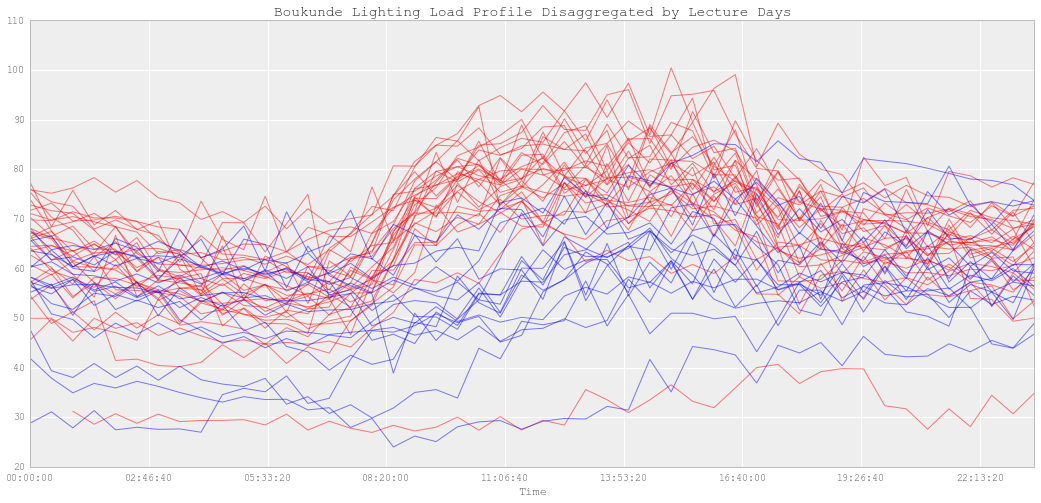

In [53]:
#Define recess and public holidays:
nolectures = pd.date_range(start='2015-03-28',end='2015-04-12').union_many([pd.date_range(start='2015-10-03',end='2015-10-11'), 
                                                                            pd.date_range(start='2015-11-09',end='2015-12-31'),
                                                                            ['2015-05-01'],
                                                                            pd.date_range(start='2015-04-28',end='2015-04-30'), 
                                                                            ['2015-08-10'],
['2015-09-24'],
['2015-09-25'],
['2015-05-01'],
pd.date_range(start='2015-06-22',end='2015-07-20'),
pd.date_range(start='2015-10-03',end='2015-10-11'),
pd.date_range(start='2015-10-03',end='2015-10-11'),
pd.date_range(start='2015-11-09',end='2015-12-31'),
pd.date_range(start='2015-01-01',end='2015-02-01')])

#Create calendar for lecture days:
from pandas.tseries.offsets import CustomBusinessDay
lecturedays_calendar=pd.bdate_range(start='2015-01-01',end='2015-12-31',freq=CustomBusinessDay(holidays=nolectures)) 

#Group data by lecture days or non-lecture days:
pivot_lights.index=pd.to_datetime(pivot_lights.index) #Convert pivot table indices to datetime format.
ldays=pivot_lights[pd.to_datetime(pivot_lights.index.date).isin(lecturedays_calendar)].transpose()
non_ldays=pivot_lights[np.logical_not(pd.to_datetime(pivot_lights.index.date).isin(lecturedays_calendar))].transpose()

#Plot data
ax=ldays.plot(color='r',legend=False,alpha=0.5,title='Boukunde Lighting Load Profile Disaggregated by Lecture Days')
non_ldays.plot(ax=ax,color='b',legend=False,alpha=0.5)

It seems to have worked, although there still are some outliers. It is clear that lecture days (in red) have signficantly higher energy use than recess days.

There is also possibly a trend in the data, so let's plot weekly energy consumption to see:

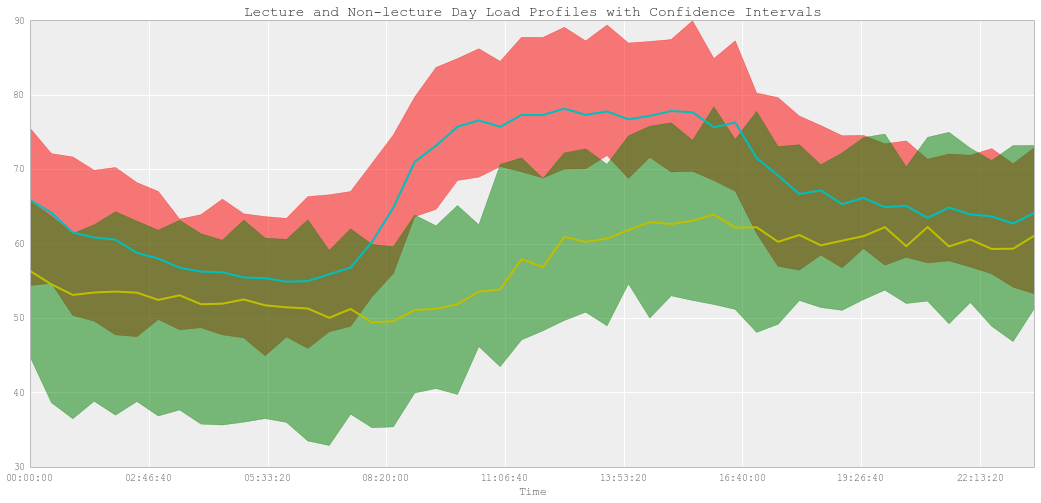

In [54]:
confidence=0.8
ldays.transpose().mean(axis=0).plot(lw=2,color='c')

non_ldays.transpose().mean(axis=0).plot(color='y',lw=2,
                                        title='Lecture and Non-lecture Day Load Profiles with Confidence Intervals')

plt.fill_between(ldays.index,
                 ldays.transpose().quantile(q=(1-confidence)/2), 
                 ldays.transpose().quantile(q=1-(1-confidence)/2),alpha=0.5,color='r')

plt.fill_between(non_ldays.index, 
                 non_ldays.transpose().quantile(q=(1-confidence)/2), 
                 non_ldays.transpose().quantile(q=1-(1-confidence)/2),alpha=0.5,color='g')

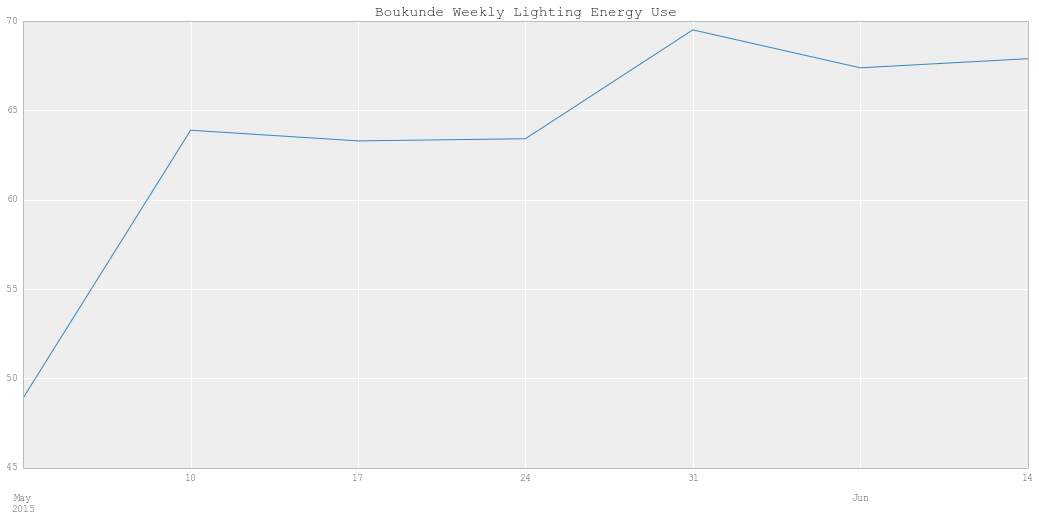

In [55]:
lights.resample("W").plot(legend=False,title='Boukunde Weekly Lighting Energy Use')

### Data Analysis Conclusion

From this we can see that the weekly energy use is not constant. Thus, using load profiles might be slightly misleading, since they do not take the underlying trend into account. More data will be needed to characterise this trend with confidence, though.

The lighting and plug load power draw seems to be more strongly correlated with occupancy than the HVAC load. The lighting load is also higher than the HVAC load, even during low-occupancy periods. From this we can conclude that significant and relatively easy energy efficiency opportunities exist in *Boukunde* through projects such as installing task lighting and occupancy sensors.

The HVAC system is relatively new and may not be altered. Increasing passive cooling and eliminating design flaws in the building will increase thermal comfort and reduce HVAC loading, although it is not possible to tell by how much simply by looking at the current data.

## Energy Conservation Measure Recommendations

The following is a list of recommended Energy Conservations Measures for Boukunde, in view of the planned . This list is preliminary and based on a walk-through audit of the building and basic analysis of energy use data, done by the students of the EES732 Energy Management module, presented to postgraduate Electrical Engineering students. Each of these ECM’s should be investigated further in order to ascertain feasibility. However, such investigations are beyond the scope of the current study.

### Building Heating, Ventilation, and Air Conditioning (HVAC)

Boukunde’s energy use can be disaggregated into Heating, Ventilation, and Air Conditioning (HVAC), and Lighting and Plug Loads. These two are metered separately in the building. Unusually, lighting contributes a larger proportion of energy use than HVAC. This can be explained by low levels of thermal comfort according to all occupants interviewed, and a high lighting requirement for design and drawing offices.
The HVAC system is relatively new, and so no significant changes to the system itself is recommended. However other measures should be taken to augment the functioning of the system, in order to arrive at acceptable thermal comfort levels.
Three measures are suggested:

#### Passive Air Conditioning

Passive air conditioning refers to cooling without the use electrical energy, using natural air flow. This can be implemented in various ways:

The thermal stratification of *Boukunde* is pronounced: Hot air rises, and in summer the temperature differential between the ground and top floors is noticeable. Due to the open plan design of the building with a multi-storey atrium, it is not practical to seal off various floors as is done in other buildings. Rather, this stratification effect should be turned into an advantage by allowing hot air on the top floor to exit the building through a [solar chimney](https://en.wikipedia.org/wiki/Solar_chimney), creating a natural updraft and drawing cool air in on the ground floor. This is done in Engineering Building 3. This chimney is to be closed on cool days as is elaborated upon below.
On a hot summers day, the air outside *Boukunde* is heated by the surrounding tar roads and parking lot – a “heat island”.  This parking lot also causes other problems, such as glare in staff offices from sunlight reflected off car windscreens. Both the heat island and glare problems may be dealt with simultaneously by covering the parking lot with north-facing solar panels (on which see below). Considerations of how this affects the aesthetics of the building is deferred to the Architecture department, but the threefold advantage of such an arrangement (electricity generation, reduced glare, reduced heat island effect) should offset the additional cost of solar panels to a conventionally covered parking lot. Should a conventionally covered parking lot be designed, it is recommended that it be a “green roof”, rather than the standard asphalt, as this will also reduce the heat island effect in front of the building.

The use of shaded areas and falling water at the main air inlets of the building should also help to ensure adequately cooled air for passive intake.

#### Thermal Destratification

In winter months the accumulation of hot air on the top floor can also be used to reduce the cooling load of the building. The building heating requirement for the bottom floors can be significantly reduced if the heat from the top floor can be redirected downwards. It is thus recommended that thermal destratification ducts and fans collect hot air from the topmost part of the building (the ceiling of the first years’ studio, for example, and feed into the ducts of the first and ground floor. The power draw of such a fan is significantly lower than that of a heating element.
The measures suggested for passive cooling during the summer months should not adversely affect the heating requirement in winter months if the building envelope is adequately sealed.

#### Geothermal Cooling

[Geothermal heat pumps](http://energy.gov/energysaver/geothermal-heat-pumps) are some of the most environmentally friendly forms of air conditioning. The temperature of the ground a few meters below the surface is constant year-round, and a very effective source of cooling. Usually the earth works for creating such a system is more expensive than a standard HVAC system. However, if such earthworks are already being planned for UP’s new urban precinct, combining these projects presents a very significant opportunity for long-term energy savings that should not be overlooked.

### Lighting

Lighting presents the most significant and easily accessible energy saving opportunity for *Boukunde*. Since Mr. Leon Pienaar has a better grasp of the interventions needed for reducing the lighting load, this report will only mention some salient points:
* Diffusing the light coming through the skylights will increase their effectiveness
* Placing an infrared filter on these skylights will allow the visible spectrum of light through the skylights without heating the building unnecessarily.
* Halogen downlighters in the exhibition spaces should be replaced with LED alternatives.
* Occupancy sensors should be installed in lecture halls and studios so that lights are not left on unnecessarily
* Task lighting (lighting the work surface to the required lux level, rather than the whole room) will make a significant impact on the lighting energy use for the building.
* [Light shelves](https://www.wbdg.org/ccb/ARMYCOE/COETN/technote02.pdf) reflect and diffuse natural incoming light in useful ways, and serve as both design features through accent lighting, and energy conservation measures. The tradeoff with possible heat gain, as well as maintenance, should be noted, however.
* Daylight sensors in offices and studios, in conjunction with the aforementioned task lighting, will ensure that areas are light to task-specific levels

Reducing the lighting energy consumption will also HVAC cooling system effectiveness, as less heat is generated inside the building. Therefore, ancilliary savings can be expected from a well-designed lighting retrofit in *Boukunde*. 

### Envelope

The building envelope concerns the heat flow into and out of the building. Some of these concerns have been addressed in the HVAC section. Other measures that can be investigated are the following:

#### Louvred metal screen windows

Angled metal screens in windows reflect incoming solar radiation during hot times of the day but allow sunshine the enter the building at times when the sun is lower, such as later in the afternoon and during winter.

#### Revolving Door

The open doors at the Boukunde entrance represent a significant envelope improvement opportunity. By installing a revolving door, cool air may be kept inside the building during summer, and hot air during winter. This measure may not be necessary, depending on the way the passive air condition system is designed. For example, if the entrance to the building can be shaded and cooled to such an extent that cool air is allowed to enter the building through the main entrance, an opening would not present a significant problem. However, it would probably be better to control how this air enters the building, to prevent warm air escaping in winter, for example. It may therefore be better to locate the building air intake in a different location to the main entrance.

### Other Measures

A requirement for a sleep function on departmental PC’s and student laptops should be implemented. This function switches the computer to sleep mode after ten minutes of inactivity, has a short payback period, and may prove to save a significant amount of energy given the number of laptops and PC’s in the building.

Finally, energy behaviour change is the [most effective way](https://www.youtube.com/watch?v=4cJ08wOqloc) to reduce most buildings’ energy use. In this regard, it is recommended that UP consult with Dr. Mathilda du Preez of [EnviroPsych Research](http://www.enviropsychresearch.co.za/) and the Psychology Department. However, basic awereness campaigns and the “gamification” of energy saving have proved to be effective energy savings motivators in numerous projects.

### Energy Generation Potential

Solar Photo-Voltaic Panels have received mixed reviews from building energy managers over the last decade, as they used to be prohibitively expensive and thus had payback periods very close to their effective useful lives. Furthermore, residential loads peak in the morning and evening when the sun doesn’t shine.  
Neither of these objections are applicable to Boukunde. Technology has improved and costs have come down. Boukunde’s energy profile also matches solar PV output well, with a midday peak.
Opportunities exist for installing solar panels as roof elements for the Boukunde parking lot, as well as on the Boukunde roof. A final decision will have to include a shading study. The following assumptions are made:

The total energy used per month, from the data available, can be calculated as follows:

In [56]:
HVAC['kwh']=HVAC['kw']*0.5
lights['kwh']=lights['kw']*0.5
lights.kwh.resample("M",how="sum")

2015-04-30     4741.095
2015-05-31    47127.230
2015-06-30    16244.225
Freq: M, Name: kwh, dtype: float64

Since only May is a full and normal month, the the total energy used by Boukunde may be estimated as 
$12\times(HVAC_{May}+Lighting_{May})$, recognising that this contains some error.

In [57]:
total_annual_energy = (lights.kwh.resample("M",how="sum")['2015-05-31']
                       +HVAC.kwh.resample("M",how="sum")['2015-05-31'])*12/1000
print(str(total_annual_energy)+ ' MWh per year')

920.63076 MWh per year


We can now make certain assumptions about the solar potential for Boukunde. Note that a shading study needs to be done in order to determine the effect that surrounding buildings may have on the total irradiance used in the calculation below. However, the 50% usable area factor should take some of this into account, as it is conservative.

In [58]:
d={'Values': [5600, 50, 6.3, 10,85,541,4950,total_annual_energy],
   'Units':  ['m^2','%','GWh','%','%','MWh','kWh/day','MWh']}
pd.DataFrame(d,index=['Area: Roof and Parking Lot','Usable Area','Annual Solar Irradiance: Pretoria',
                      'Solar Panel Efficiency','Electrical Conversion Efficiency','Potential Solar Energy',
                      'Average energy use: May 2015', 'Estimated Annual Energy use'],columns=['Values','Units'])

Values    Units
Area: Roof and Parking Lot         5600.00000      m^2
Usable Area                          50.00000        %
Annual Solar Irradiance: Pretoria     6.30000      GWh
Solar Panel Efficiency               10.00000        %
Electrical Conversion Efficiency     85.00000        %
Potential Solar Energy              541.00000      MWh
Average energy use: May 2015       4950.00000  kWh/day
Estimated Annual Energy use         920.63076      MWh

[8 rows x 2 columns]

Thus, the proposed solar panels can provide at least 59% of *Boukunde*’s annual energy requirement, matched well with its daily load profile. Payback period calculations will depend on the price for the panels secured by UP, as well as the time of use tariff paid by UP. However, it should be noted that most of the savings will be realised within the standard rate time period.

Note: [PVWatts](http://pvwatts.nrel.gov/pvwatts.php), NREL's PV calculator, forecasts that placing solar panels over the parking lot alone will generate 426.217MWh of solar energy per year. 

## Conclusion

A significant potential for energy savings exist for the *Boukunde* building. From previous case studies, projects similar to this one saved 30-50% on their energy use. However, its success depends on how professionally the measures are implemented, and on the interactions between them. However, only implementing certain measures may result in subpar performance and lower than expected savings.